# Kuliah pertemuan ke 2

## Data Loading

In [9]:
import pandas as pd

df = pd.read_csv('../datasets/Agrofood_co2_emission.csv')

df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


## Check Missing Data

In [10]:
df.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


## Missing Data Visualization

<Axes: >

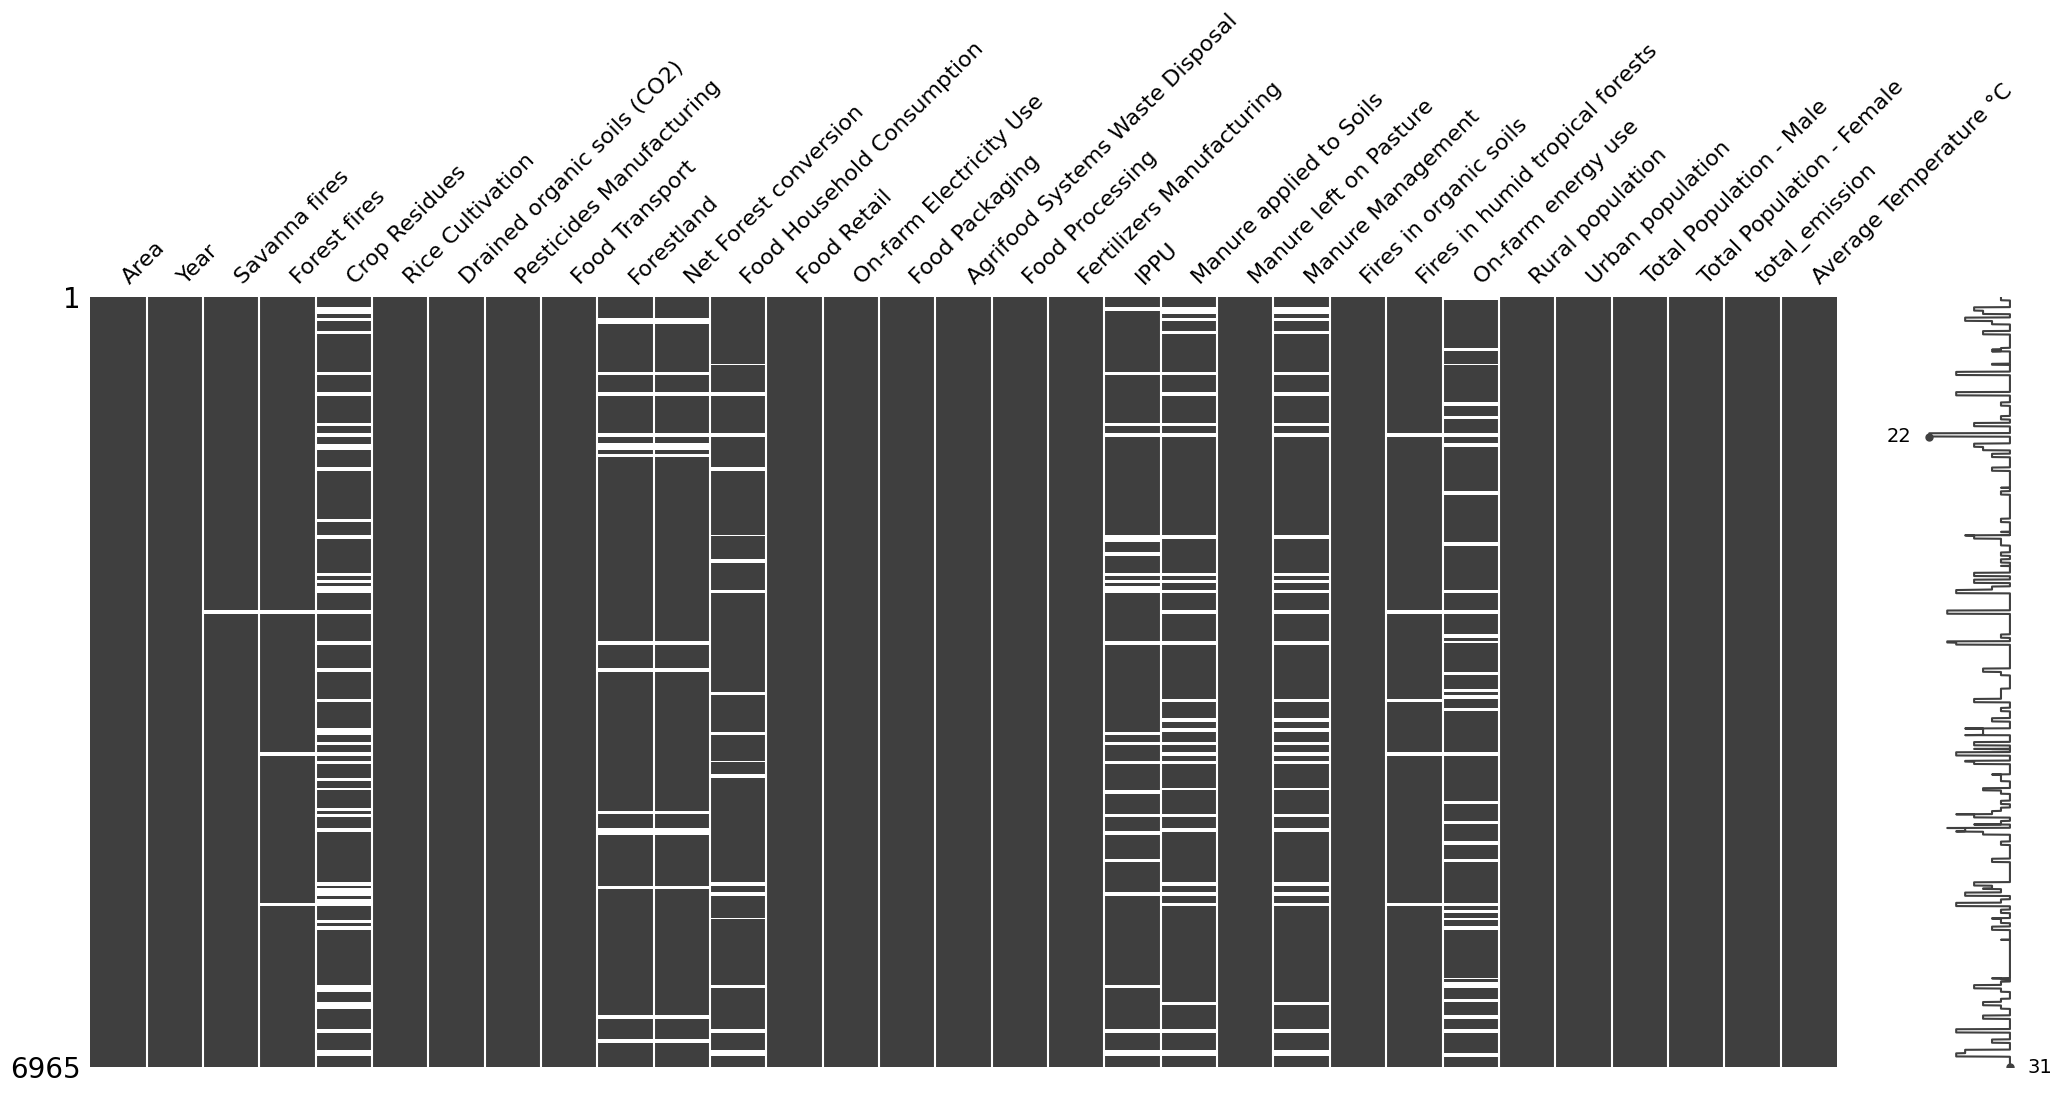

In [11]:
import missingno as msno

msno.matrix(df)

## Handing Missing Value

Multivariate Imputation (MICE / IterativeImputer)

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

features = [
    "Savanna fires",
    "Forest fires",
    "Crop Residues",
    'Rice Cultivation',
    'Forestland',
    'Net Forest conversion',
    'Food Household Consumption',
    'IPPU',
    'Manure applied to Soils',
    'Manure Management',
    'Fires in humid tropical forests',
    'On-farm energy use'
]
data_subset = df[features]

mice_imputer = IterativeImputer(random_state=0, max_iter=10)

imputed_data = mice_imputer.fit_transform(data_subset)

df_clean = pd.DataFrame(imputed_data, columns=features)

df_clean.isnull().sum()

Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
IPPU                               0
Manure applied to Soils            0
Manure Management                  0
Fires in humid tropical forests    0
On-farm energy use                 0
dtype: int64

## Visualization after handled datasets

<Axes: >

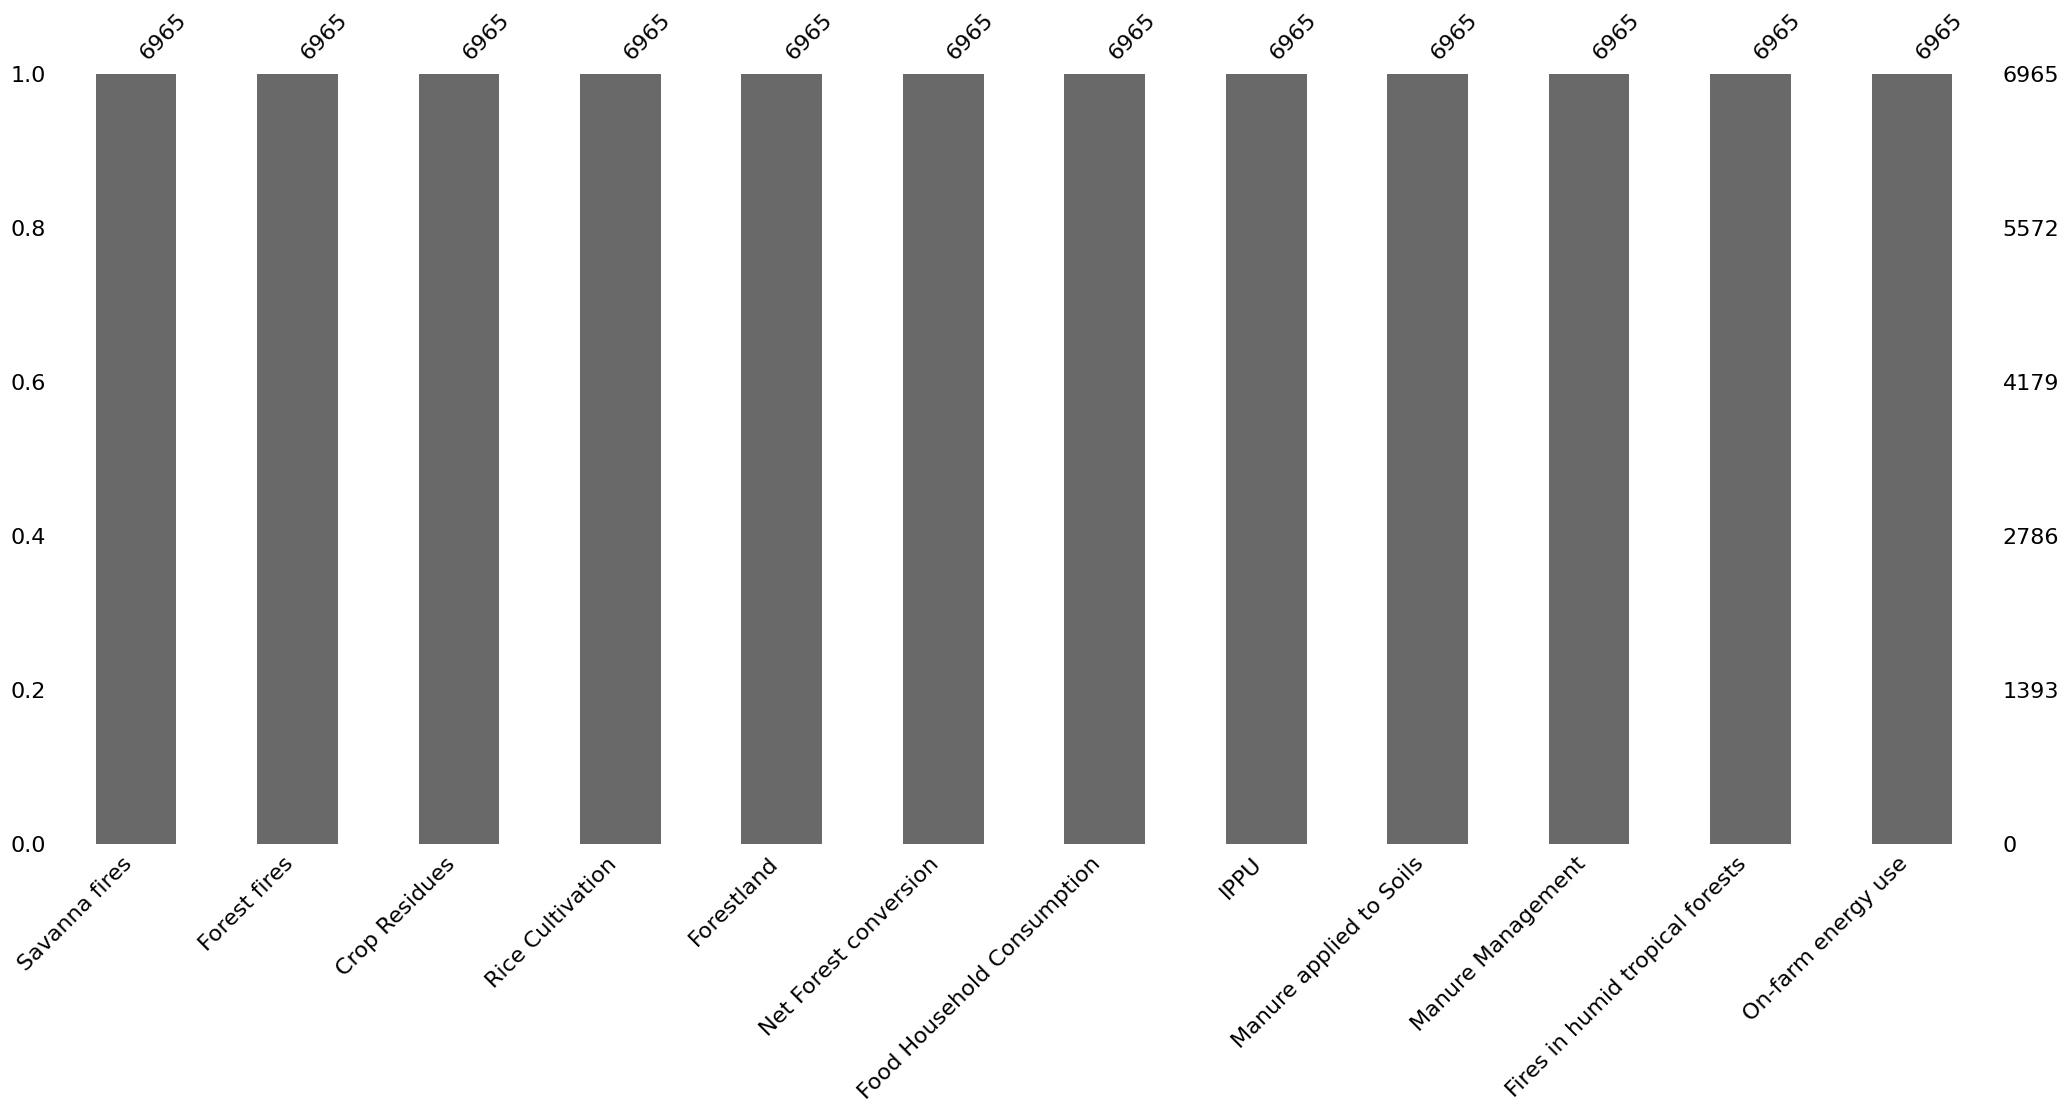

In [13]:
msno.bar(df_clean)

## Crete new final DataFrame

In [14]:
df_final = df.copy()

df_final[features] = df_clean[features].values

## Check missing data

<Axes: >

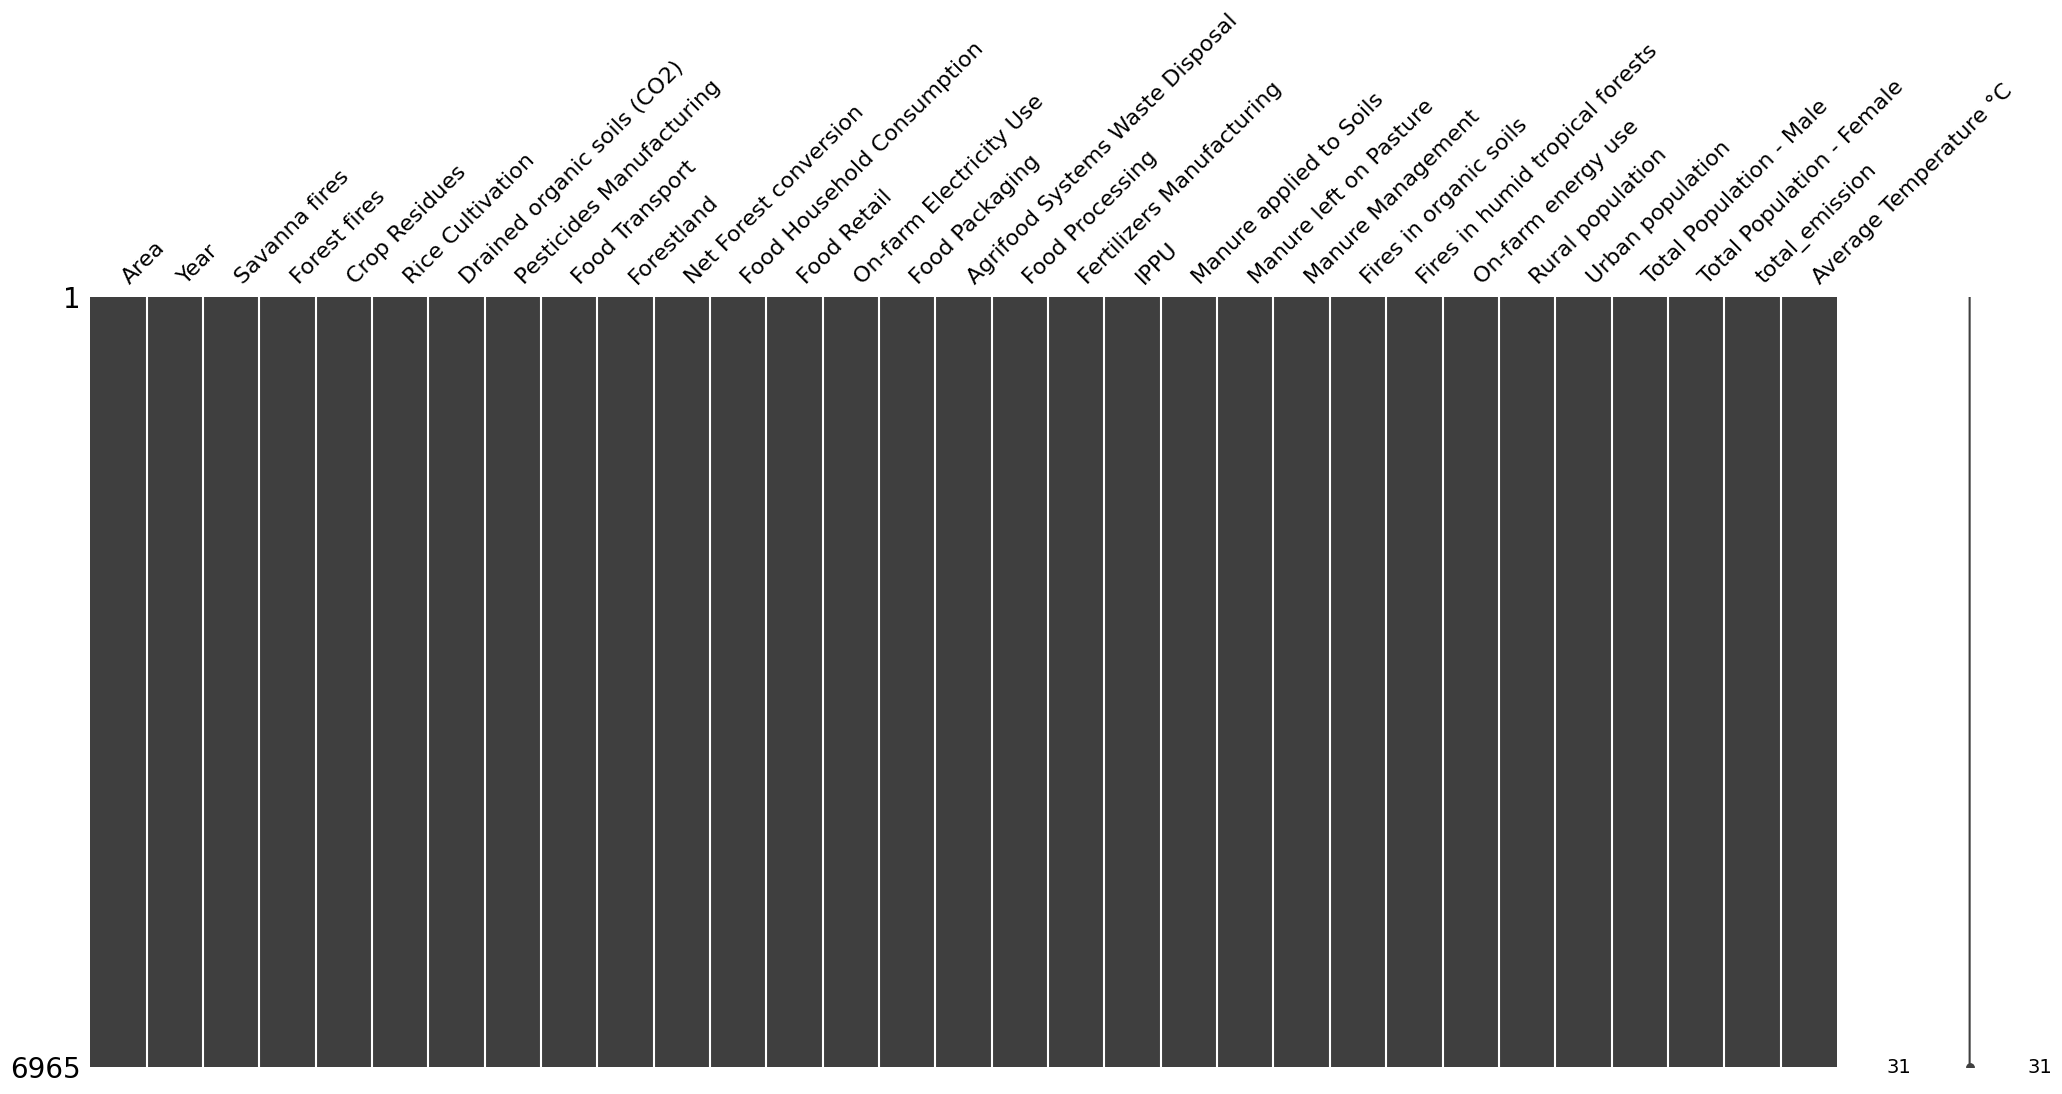

In [15]:
msno.matrix(df_final)

## Check missing value with calculate

In [17]:
df_final.isnull().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
Rural population                   0
Urban population                   0
T

## Analysis descriptive

In [21]:
df_final.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,...,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1186.748010,916.364429,854.073827,4259.666673,3503.228636,333.418393,1939.581760,-16619.321101,1.648687e+04,...,2116.935846,1210.315532,659.220604,2671.081448,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5234.655601,3695.259095,3325.926871,17613.825187,15861.445678,1429.159367,5616.748808,79014.237144,9.763151e+04,...,7441.586615,22669.847760,3229.183497,11782.475945,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,-45.113265,0.000000,0.000000,0.000000,0.000100,-797183.079000,-4.307324e+04,...,0.432900,0.000000,-82.271745,-5851.182336,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,8.594800,181.260800,0.000000,6.000000,27.958600,-3136.798100,0.000000e+00,...,52.707800,0.000000,0.000000,10.817500,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.690800,0.646500,128.628800,534.817400,0.000000,13.000000,204.962800,-61.501400,8.437180e+01,...,410.146200,0.000000,0.000000,131.200100,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,122.685600,78.057200,392.578341,1536.640000,690.408800,116.325487,1207.000900,0.000000,5.356894e+03,...,1187.520900,0.000000,14.301800,1195.669100,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


In [22]:

df[['Total Population - Male', 'total_emission', 'Average Temperature °C']].describe()

,Total Population - Male,total_emission,Average Temperature °C
count,6.965000e+03,6.965000e+03,6965.000000
mean,1.761963e+07,6.409124e+04,0.872989
std,7.603993e+07,2.283130e+05,0.555930
min,2.500000e+02,-3.918841e+05,-1.415833
25%,2.013260e+05,5.221244e+03,0.511333
50%,2.469660e+06,1.214765e+04,0.834300
75%,9.075924e+06,3.513973e+04,1.206750
max,7.435866e+08,3.115114e+06,3.558083


## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaling_features = [
    'Total Population - Male', 
    'Total Population - Female', 
    'total_emission', 
    'Rural population', 
    'Urban population'
]

data_scaled = scaler.fit_transform(df_final[scaling_features])

data_scaled

array([[-0.16139052, -0.16518749, -0.27110474, -0.09215455, -0.21811059],
       [-0.16106735, -0.1648317 , -0.27055758, -0.08569089, -0.21553646],
       [-0.1524458 , -0.15577483, -0.27041554, -0.07709536, -0.21215192],
       ...,
       [-0.13853753, -0.12905864,  0.14707652, -0.07181296, -0.17470301],
       [-0.13661751, -0.12690124,  0.1528574 , -0.06888941, -0.17281658],
       [-0.13460223, -0.12466949,  0.14198189, -0.06603537, -0.17085526]])

## Visualization Feature Scaling

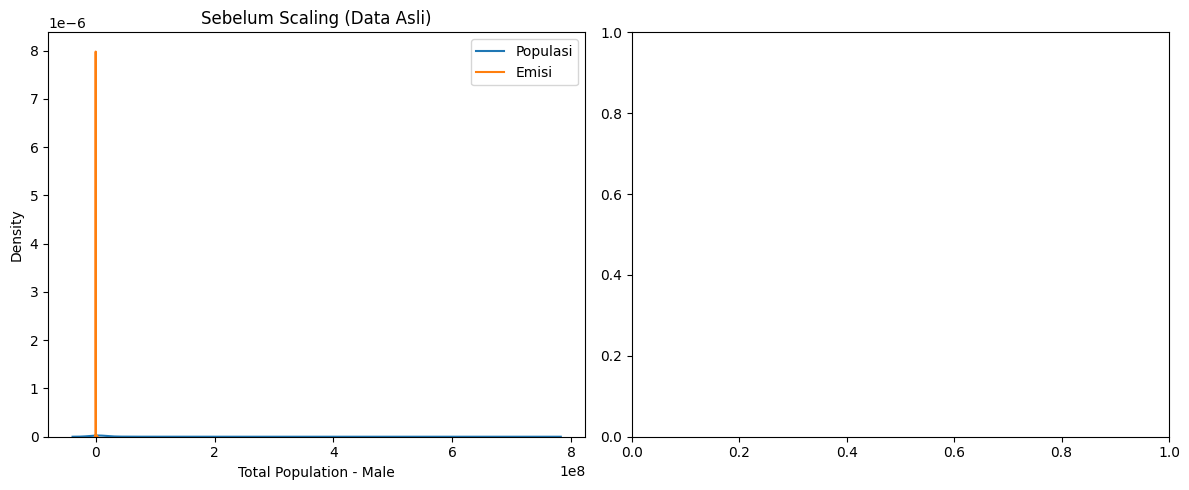

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seting layout 1 baris 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Sebelum Scaling (Data asli dari df)
ax1.set_title('Sebelum Scaling (Data Asli)')
sns.kdeplot(df['Total Population - Male'], ax=ax1, label='Populasi')
sns.kdeplot(df['total_emission'], ax=ax1, label='Emisi')
ax1.legend()

# Sesudah Scaling (Data dari df_clean hasil StandardScaler)
# ax2.set_title('Sesudah Scaling (StandardScaler)')
# sns.kdeplot(df_clean['Total Population - Male'], ax=ax2, label='Populasi')
# sns.kdeplot(df_clean['total_emission'], ax=ax2, label='Emisi')
# ax2.legend()

plt.tight_layout()
plt.show()